In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel("Actores_Sociales.xlsx")
data

,CODIGO ÚNICO,Nombre del Aliado,Tipo,Red 1,Familia,Status,Fecha del Status,Área Social,Proyectos anteriores con UeR,Cant Beneficiarios,Descripción de Organización,Pagina web,Instagram,Facebook,Twitter,ODS,Beneficiarios,Pais
0,2,AID FOR AIDS,Fundación,Unidos en Red,NaN,Activa,NaN,Salud,NaN,1164330,Es una organización sin fines de lucro comprom...,https://aidforaids.org/?lang=es,https://www.instagram.com/aidforaids/,https://www.facebook.com/aidforaids,https://twitter.com/AIDFORAIDSINTL,3.0,mixto,PANAMA
1,4,ALEJANDRO SANZ,Personalidad,La Fuerza del Corazón,NaN,Activa,NaN,Derechos Humanos,NaN,NaN,Sanz ha sido reconocido por su implicación dir...,www.alejandrosanz.com,alejandrosanz,Asanzoficial,@alejandrsanz,1.0,mixto,NaN
2,6,AMÉRICA SOLIDARIA,Fundación,Unidos en Red,NaN,Inactiva,NaN,Salud,Usuario Blackboard,33,ONG que construye redes entre los países de la...,http://americasolidaria.org/,https://www.instagram.com/americasolidaria/,https://www.facebook.com/americasolidaria,https://twitter.com/americasolidari,1.0,mixto,NaN
3,7,AMERICAN FRIENDS OF FCI,Fundación,Unidos en Red,NaN,Activa,NaN,Salud,Desarrollo Pagina Web,2500,Es una organización sin fines de lucro dedicad...,https://cardioinfantilfriends.org/,https://www.instagram.com/cardioinfantilfriends/,https://www.facebook.com/fcardioinfantil/,https://twitter.com/fcardioinfantil,3.0,niños y niñas,COLOMBIA
4,8,AMIS DU WELLBEING PROJECT (AWP),Fundación,Unidos en Red,NaN,Inactiva,NaN,Bienestar,NaN,NaN,Transformar la cultura del sector de la innova...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,159,RAFAEL MÁRQUEZ,Personalidad,Starlite,NaN,Inactiva,NaN,Deportes,NaN,NaN,"Rafael Márquez futbolista, nacido en Michoacán...",NaN,@rafa_marquez_rm4,NaN,@RafaMarquezMX,NaN,NaN,NaN
196,162,SARAH FERGUNSON,Personalidad,Starlite,NaN,Inactiva,NaN,Niños y Jóvenes,NaN,NaN,Duquesa de York y ex esposa del Principe André...,NaN,sarahferguson15,NaN,@SarahTheDuchess,NaN,NaN,NaN
197,167,SERGIO SCARIOLLO,Personalidad,Starlite,NaN,Inactiva,NaN,Deportes,NaN,NaN,Entrenador y seleccionador del equipo español ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,175,TEREZA MAXOVA,Personalidad,Starlite,NaN,Inactiva,NaN,Paz,NaN,NaN,Modelo de las más exclusivas pasarelas y ha si...,http://www.nadaceterezymaxove.cz/en,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CODIGO ÚNICO                  200 non-null    int64  
 1   Nombre del Aliado             200 non-null    object 
 2   Tipo                          200 non-null    object 
 3   Red 1                         200 non-null    object 
 4   Familia                       36 non-null     object 
 5   Status                        200 non-null    object 
 6   Fecha del Status              0 non-null      float64
 7   Área Social                   183 non-null    object 
 8   Proyectos anteriores con UeR  46 non-null     object 
 9   Cant Beneficiarios            76 non-null     object 
 10  Descripción de Organización   182 non-null    object 
 11  Pagina web                    171 non-null    object 
 12  Instagram                     119 non-null    object 
 13  Faceb

In [ ]:
data.describe()

,CODIGO ÚNICO,Fecha del Status,ODS
count,200.00000,0.0,164.000000
mean,100.88000,NaN,6.786585
std,58.28888,NaN,5.323596
min,1.00000,NaN,1.000000
25%,50.75000,NaN,3.000000
50%,100.50000,NaN,4.000000
75%,151.25000,NaN,10.250000
max,201.00000,NaN,17.000000


In [ ]:
Inactivos = ['Inactiva']
filtroInactivos = data['Status'].isin(Inactivos)
dataAct = pd.DataFrame(data.drop(data[filtroInactivos].index))

print(data.shape)
print(dataAct.shape)

(200, 18)
(163, 18)


In [ ]:
data1 = dataAct.drop(['Descripción de Organización','CODIGO ÚNICO','Status',
                      'Fecha del Status','Proyectos anteriores con UeR',
                      'Pagina web','Instagram','Twitter','Facebook'], axis=1)

In [ ]:
data1['ODS'].fillna(0, inplace=True)

In [ ]:
data2 = data1.replace(np.nan, "No definido")
data2.head()

,Nombre del Aliado,Tipo,Red 1,Familia,Área Social,Cant Beneficiarios,ODS,Beneficiarios,Pais
0,AID FOR AIDS,Fundación,Unidos en Red,No definido,Salud,1164330,3.0,mixto,PANAMA
1,ALEJANDRO SANZ,Personalidad,La Fuerza del Corazón,No definido,Derechos Humanos,No definido,1.0,mixto,No definido
3,AMERICAN FRIENDS OF FCI,Fundación,Unidos en Red,No definido,Salud,2500,3.0,niños y niñas,COLOMBIA
5,APORTA,Fundación,Padres e Hijos,No definido,Tecnología,1585,11.0,mixto,PERU
6,ARYMAX,Fundación,Padres e Hijos,Feffer,Educación,65,4.0,mixto,BRASIL


In [ ]:
dataC1 = data2.drop(['Tipo', 'Red 1', 'Familia', 'Área Social', 'Cant Beneficiarios'], axis=1)
dataC1['Clasificacion'] = 'Aliado'
dataC1.head()

,Nombre del Aliado,ODS,Beneficiarios,Pais,Clasificacion
0,AID FOR AIDS,3.0,mixto,PANAMA,Aliado
1,ALEJANDRO SANZ,1.0,mixto,No definido,Aliado
3,AMERICAN FRIENDS OF FCI,3.0,niños y niñas,COLOMBIA,Aliado
5,APORTA,11.0,mixto,PERU,Aliado
6,ARYMAX,4.0,mixto,BRASIL,Aliado


In [ ]:
# Convocatorias

Conv = pd.read_excel("resultados.xlsx", sheet_name='Sheet1')
Conv

,Unnamed: 0,palabra clave,titulo,enlace,descripcion,clave,Pais,ODS,Beneficiarios
0,0,convocatoria social + alimentacion,abierta la convocatoria 'sistemas alimentarios...,https://www.fondationcarasso.org/es/alimentaci...,"apr 18, 2022 — la alimentación sostenible como...",alimentacion,Por identificar,2,mixto
1,1,cooperacion social + niños,la cooperación o colaboración. educar en valor...,https://www.guiainfantil.com/articulos/educaci...,NaN,educacion,Por identificar,4,mixto
2,2,cooperacion social + discapacidad,redes y asociaciones internacionales - discapa...,https://biblioguias.cepal.org/c.php?g=159510&p...,by c vilches · 2011 — discapacidad e inclusión...,discapacidad,Por identificar,10,mixto
3,3,cooperacion social + estudiantes,cooperación entre alumnos expertos - cippec,https://www.cippec.org/innovaciones-educativas...,cooperación entre alumnos expertos. transforma...,educacion,Por identificar,4,mixto
4,4,apoyo economico + seguridad,"asistencia financiera para comida, vivienda y ...",https://www.usa.gov/espanol/asistencia-financi...,"aug 30, 2021 — el servicio de impuestos intern...",alimentacion,ESTADOS UNIDOS,1,mixto
...,...,...,...,...,...,...,...,...,...
849,1037,programa social + vulnerabilidad,"focalización de programas sociales, vulnerabil...",https://revistaideele.com/ideele/content/focal...,"focalización de programas sociales, vulnerabil...",vulnerabilidad,Por identificar,1,mixto
850,1038,programa social + vulnerabilidad,atención a grupos en situación de vulnerabilidad,https://qroo.gob.mx/plan-de-accion/programa-25...,"4.25.14 coordinar, en colaboración con los sec...",vulnerabilidad,MEXICO,1,mixto
851,1039,programa social + vulnerabilidad,la vulnerabilidad social y sus desafíos - repo...,https://repositorio.cepal.org/bitstream/handle...,by r pizarro hofer · 2001 · cited by 747 — de ...,vulnerabilidad,Por identificar,1,mixto
852,1040,programa social + vulnerabilidad,acción - apoyo a iniciativas familiares y comu...,https://programassociales.ministeriodesarrollo...,descripción y objetivos del programa. el progr...,comunitario,CHILE,11,mixto


In [ ]:
Conv1 = Conv.drop(['Unnamed: 0', 'palabra clave', 'enlace', 'descripcion', 'clave'], axis = 1)
Conv1['Clasificacion'] = 'Convocatoria'
Conv1 = Conv1.reindex(columns=['titulo', 'ODS', 'Beneficiarios', 'Pais',	'Clasificacion'])
Conv1.head()

,titulo,ODS,Beneficiarios,Pais,Clasificacion
0,abierta la convocatoria 'sistemas alimentarios...,2,mixto,Por identificar,Convocatoria
1,la cooperación o colaboración. educar en valor...,4,mixto,Por identificar,Convocatoria
2,redes y asociaciones internacionales - discapa...,10,mixto,Por identificar,Convocatoria
3,cooperación entre alumnos expertos - cippec,4,mixto,Por identificar,Convocatoria
4,"asistencia financiera para comida, vivienda y ...",1,mixto,ESTADOS UNIDOS,Convocatoria


In [ ]:
Conv1['ODS'] = Conv1['ODS'].replace('Por identificar', 0)

In [ ]:
dataC2 = pd.concat([dataC1, Conv1])
print(dataC2.shape)
dataC2.head()

(1017, 6)


,Nombre del Aliado,ODS,Beneficiarios,Pais,Clasificacion,titulo
0,AID FOR AIDS,3.0,mixto,PANAMA,Aliado,NaN
1,ALEJANDRO SANZ,1.0,mixto,No definido,Aliado,NaN
3,AMERICAN FRIENDS OF FCI,3.0,niños y niñas,COLOMBIA,Aliado,NaN
5,APORTA,11.0,mixto,PERU,Aliado,NaN
6,ARYMAX,4.0,mixto,BRASIL,Aliado,NaN


In [ ]:
dataC2['ODS'] = dataC2['ODS'].astype('int')
dataC2['ODS'].value_counts()

4     208
0     204
9     137
1     100
3      97
17     81
2      59
11     56
13     23
10     20
8      16
14      5
16      4
5       3
6       2
7       1
12      1
Name: ODS, dtype: int64

In [ ]:
dataCluster = dataC2.drop(['Nombre del Aliado', 'titulo', 'Clasificacion'], axis = 1)

In [ ]:
# Transformación variables categóricas
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
dataCluster['ODS'] = enc.fit_transform(dataCluster['ODS'])
dataCluster['Pais'] = enc.fit_transform(dataCluster['Pais'])
dataCluster['Beneficiarios'] = enc.fit_transform(dataCluster['Beneficiarios'])


In [ ]:
# Normalización

from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(dataCluster)
data_norm.shape

(1017, 3)

In [ ]:
!pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4232 sha256=a0f08dbb80c664a490ca591787863935170083f583b2933b74aec6ca56aa6e34
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [ ]:
#import gower as go

#distance_matrix = go.gower_matrix(dataCluster)
#distance_matrix.shape

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
minPts=2

for eps in np.arange(0.01, 0.35, 0.01):
  db = DBSCAN(eps, min_samples=minPts).fit(data_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))

  0.01, 98, 93
  0.02, 98, 93
  0.03, 98, 93
  0.04, 98, 93
  0.05, 91, 50
  0.06, 91, 50
  0.07, 54, 34
  0.08, 51, 33
  0.09, 51, 33
  0.10, 37, 18
  0.11, 37, 18
  0.12, 36, 17
  0.13, 26, 15
  0.14, 22, 12
  0.15, 22, 12
  0.16, 20, 11
  0.17, 20, 11
  0.18, 20, 11
  0.19, 18, 8
  0.20, 10, 7
  0.21, 5, 4
  0.22, 5, 4
  0.23, 3, 3
  0.24, 3, 3
  0.25, 3, 2
  0.26, 3, 2
  0.27, 3, 2
  0.28, 3, 1
  0.29, 3, 1
  0.30, 3, 1
  0.31, 3, 1
  0.32, 3, 0
  0.33, 2, 0
  0.34, 2, 0


In [ ]:
# Configurando los parámetros del algoritmo DBSCAN
dbscan_cluster = DBSCAN(eps=0.04, 
                        min_samples=2, 
                        metric='euclidean')

# Ejecutando el algoritmo en la base de datos
dbscan_cluster.fit(data_norm)

# Agregando los resultados en una columan del data set
dataC2["clusterDBSCAN"] = dbscan_cluster.labels_

In [ ]:
dataC2['clusterDBSCAN'].value_counts()

 38    98
-1     93
 47    79
 54    40
 37    38
       ..
 13     2
 50     2
 1      2
 2      2
 97     2
Name: clusterDBSCAN, Length: 99, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(data_norm, dataC2['clusterDBSCAN'], metric='euclidean')

0.832909605874134

### Clustering Probabilístico

In [ ]:
#data3 = data.drop(['Familia', 'Beneficiarios','Descripción de Organización','CODIGO ÚNICO', 'Nombre del Aliado','Fecha del Status','Proyectos anteriores con UeR','Pagina web','Instagram','Twitter','Facebook', 'clusterDBSCAN', 'clusterProb'], axis=1)

#distance_matrix2 = go.gower_matrix(data3)
#distance_matrix2.shape

(200, 200)

In [ ]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 150)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_norm)
          for n in n_components]

([<matplotlib.axis.XTick at 0x7f8315601750>,
 <a list of 30 Text major ticklabel objects>)

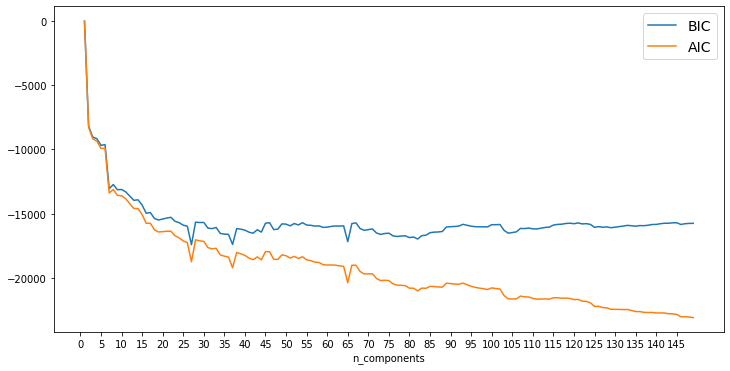

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(n_components, [m.bic(data_norm) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_norm) for m in models], label='AIC')
plt.legend(loc='best', fontsize = 14)
plt.xlabel('n_components')
ticks = range(0, 150, 5)
plt.xticks(ticks) 

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=105, covariance_type='full', random_state=1).fit(data_norm)
labels2 = gmm.predict(data_norm)

In [ ]:
probs = gmm.predict_proba(data_norm)
print(probs.round(3))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
dataC2['clusterProb2'] = labels2

silhouette_score(data_norm, dataC2['clusterProb2'], metric='euclidean')

0.8431284423369381

In [ ]:
dataC2['clusterProb2'].value_counts()

29     98
9      79
4      40
39     38
13     37
       ..
87      1
47      1
82      1
103     1
83      1
Name: clusterProb2, Length: 105, dtype: int64

### Fuzzy

In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
#from sklearn.cluster import KMeans
from fcmeans import FCM
from sklearn.metrics import cluster
from sklearn import metrics

In [ ]:
from pandas.core.common import random_state

silhouettes = []

for i in range(10, 100):
  fz = FCM(n_clusters = i, max_inter = 300, m = 2, random_state = 987)
  clustering_fit = fz.fit(data_norm)
  clustering = fz.predict(data_norm)
  #distortions.append(fz.inertia_)
  silhouettes.append(silhouette_score(data_norm, clustering))

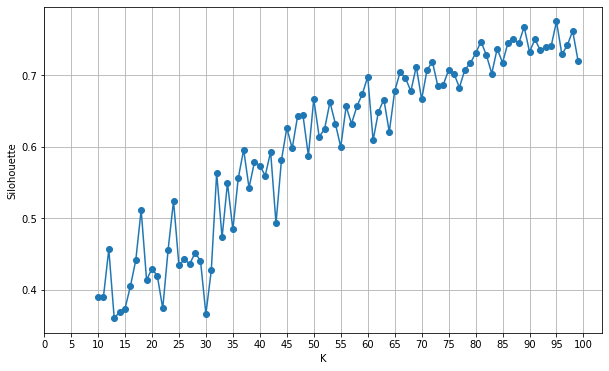

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(10,100), silhouettes , marker='o')
plt.xticks(range(0, 105, 5))
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.grid(True)
plt.show()

In [ ]:
fcm = FCM(n_clusters=95, random_state=987)
fcm_fit = fcm.fit(data_norm)
fcm_labels = fcm.predict(data_norm)

In [ ]:
dataC2['clusterFCM'] = fcm_labels

silhouette_score(data_norm, dataC2['clusterFCM'], metric='euclidean')

0.7754536753059725

In [ ]:
dataC2['clusterFCM'].value_counts()

89    102
5      81
66     40
14     40
57     38
     ... 
88      1
76      1
94      1
47      1
37      1
Name: clusterFCM, Length: 95, dtype: int64

### K-Modes

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [ ]:
dataCategorica = dataC2.drop(['Nombre del Aliado', 'titulo', 'Clasificacion', 'clusterDBSCAN', 'clusterProb2', 'clusterFCM'], axis = 1)
dataCategorica['ODS'] = dataCategorica['ODS'].astype('object')
dataCategorica.head()


,ODS,Beneficiarios,Pais
0,3,mixto,PANAMA
1,1,mixto,No definido
3,3,niños y niñas,COLOMBIA
5,11,mixto,PERU
6,4,mixto,BRASIL


In [ ]:
# Filter categorical variables
num_cols = dataCategorica._get_numeric_data().columns
cols = dataCategorica.columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

#Value counts
for col in cat_cols:
    if col in ['ODS','Beneficiarios','Pais']:
        print(dataCategorica[col].value_counts())

Por identificar         476
ESPAÑA                  115
MEXICO                   93
No definido              88
COLOMBIA                 69
ARGENTINA                43
CHILE                    34
PERU                     25
ESTADOS UNIDOS           19
VENEZUELA                10
BRASIL                    8
PARAGUAY                  7
ECUADOR                   6
PANAMA                    5
REPUBLICA DOMINICANA      4
URUGUAY                   4
EL SALVADOR               3
BOLIVIA                   2
COSTA RICA                2
PUERTO RICO               1
CUBA                      1
NICARAGUA                 1
GUATEMALA                 1
Name: Pais, dtype: int64
mixto            843
niños y niñas     72
jovenes           49
migrantes         26
adulto mayor      16
mujeres           11
Name: Beneficiarios, dtype: int64
4     208
0     204
9     137
1     100
3      97
17     81
2      59
11     56
13     23
10     20
8      16
14      5
16      4
5       3
6       2
7       1
12      1
N

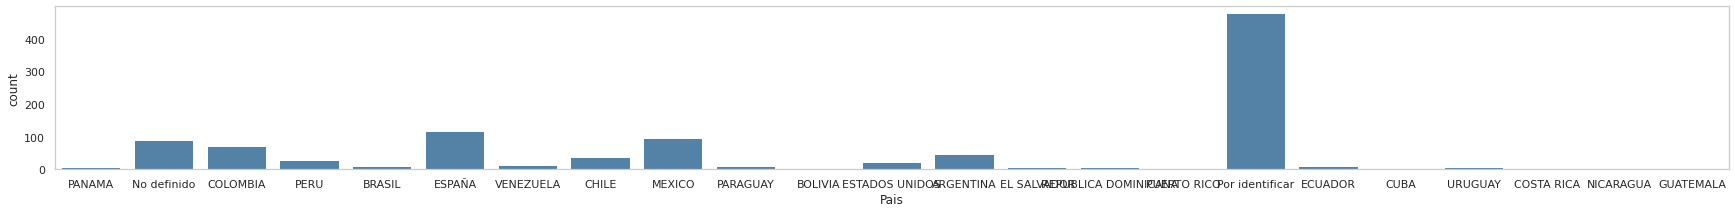

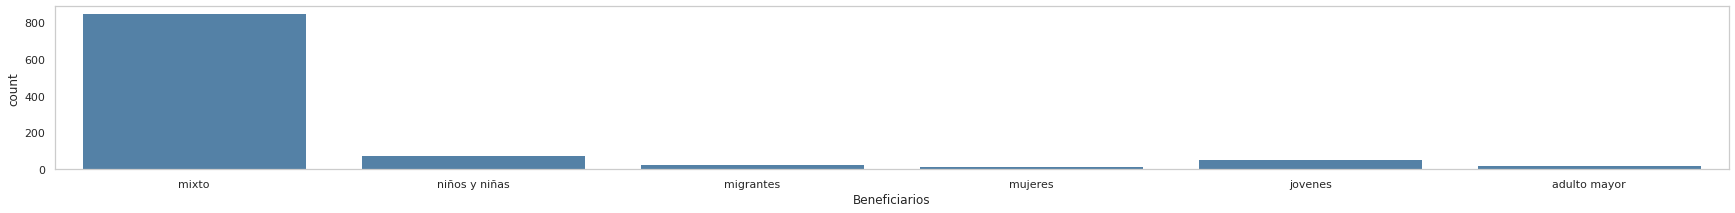

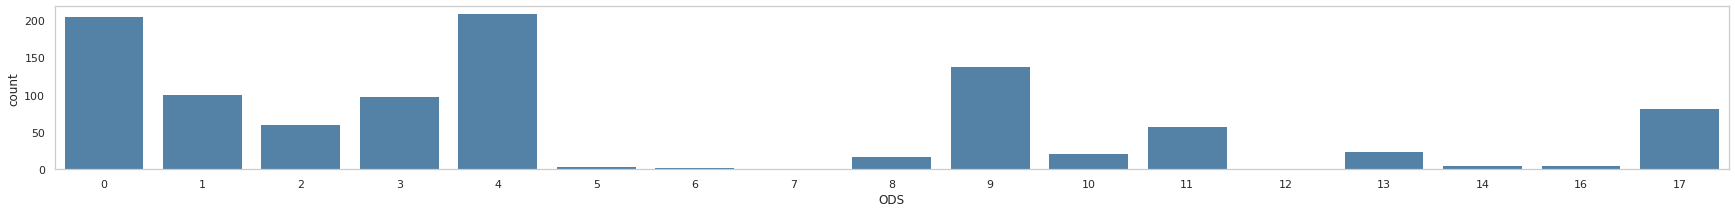

In [ ]:
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(30,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

for col in cat_cols:
    if col in ['ODS','Beneficiarios','Pais']:
        count_plot(dataCategorica,col)

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 25.5 MB/s 
     |████████████████████████████████| 944 kB 85.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


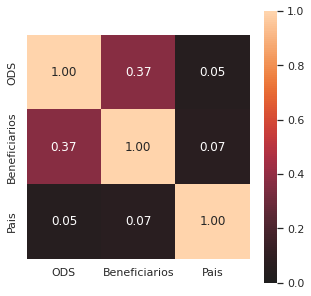

In [ ]:
from dython.nominal import associations

def associations_example():
    associations(dataCategorica,nominal_columns=['ODS','Beneficiarios','Pais'])
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=5,5
associations_example()

In [ ]:
catColumnsPos = [dataCategorica.columns.get_loc(col) for col in list(dataCategorica.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(dataCategorica.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['ODS', 'Beneficiarios', 'Pais']
Categorical columns position  : [0, 1, 2]


In [ ]:
#Choosing optimal K value
# Elbow curve to find optimal K
cost = []
K = range(2,150)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = 'Huang', n_init = 5)
    kmode.fit_predict(dataCategorica)
    cost.append(kmode.cost_)

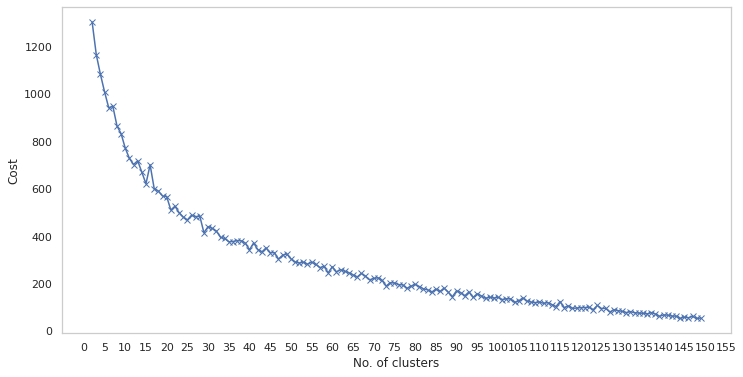

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(K, cost, 'bx-')
plt.xticks(range(0, 160, 5))
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
#plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
silhouettes2 = []

for i in range(10, 150):
  km = KModes(n_clusters=num_clusters, init = 'Huang', n_init = 5, random_state=678)
  clustering = kmode.fit_predict(dataCategorica)
  silhouettes2.append(silhouette_score(data_norm, clustering))

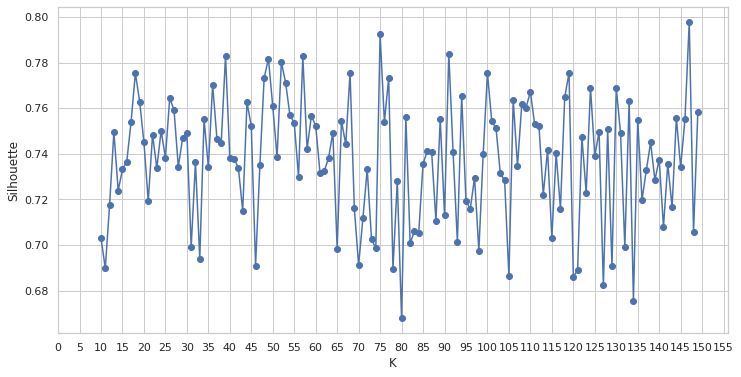

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(10,150), silhouettes2 , marker='o')
plt.xticks(range(0, 160, 5))
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

In [ ]:
kmode = KModes(n_clusters=147, init = 'Huang', n_init = 5, random_state = 678)
clustersKM = kmode.fit_predict(dataCategorica)

In [ ]:
dataC2['clustersKM'] = clustersKM

silhouette_score(data_norm, dataC2['clustersKM'], metric='euclidean')

0.7506730532386287

In [ ]:
dataC2['clustersKM'].value_counts()

146    98
104    79
16     40
123    38
109    36
       ..
43      1
107     1
34      1
78      1
108     1
Name: clustersKM, Length: 147, dtype: int64

### Exportación de datos

In [ ]:
dataC2.head()

,Nombre del Aliado,ODS,Beneficiarios,Pais,Clasificacion,titulo,clusterDBSCAN,clusterProb2,clusterFCM,clustersKM
0,AID FOR AIDS,3,mixto,PANAMA,Aliado,NaN,-1,80,23,12
1,ALEJANDRO SANZ,1,mixto,No definido,Aliado,NaN,0,49,75,127
3,AMERICAN FRIENDS OF FCI,3,niños y niñas,COLOMBIA,Aliado,NaN,-1,17,33,40
5,APORTA,11,mixto,PERU,Aliado,NaN,1,76,87,0
6,ARYMAX,4,mixto,BRASIL,Aliado,NaN,2,97,71,45


In [ ]:
# Specify the name of the excel file
file_name = 'clusteringDataCompleto.xlsx'
  
# saving the excelsheet
dataC2.to_excel(file_name)
print('saved it')

saved it


### Análisis descriptivo

In [ ]:
dataC2.groupby('clustersKM').agg(['median' ,'mean']).T

clustersKM       0         1    2     3         4         5    6    7    8    \
ODS median  0.000000  0.000000  9.0  10.0  4.000000  1.000000  0.0  4.0  1.0   
    mean    0.384615  0.344828  9.0   9.6  6.166667  3.137931  0.0  4.0  1.0   

clustersKM  9    ...  105  106  107  108   109   110  111   112  113  114  
ODS median  6.0  ...  0.0  4.0  0.0  1.0  10.0  11.0  3.0  17.0  0.0  4.0  
    mean    6.0  ...  0.0  4.0  0.0  1.0  10.0  11.0  3.0  17.0  0.0  4.0  

[2 rows x 115 columns]